In [1]:
%load_ext autoreload
%autoreload 1
from accelerator import *

import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# matching the lattice of the first tutorial to get a beta max of 300 meters

In [2]:
cirumference = 1000  # meters
proton_energy = 15  # GeV
dipole_length = 5  # meters
dipole_B_max = 2  # T

In [3]:
n_cells = 8  # ??
dipole_angle = np.pi / 16  # ??

In [4]:
cell_length = cirumference / n_cells
drift = Drift(cell_length / 6)
dipole_thin = DipoleThin(dipole_angle)

In [5]:
quad_focal_length = 2 / 8.89e-3

In [6]:
half_quad_f_thin = QuadrupoleThin(quad_focal_length * 2, name="quad_thin_f")
quad_d_thin = QuadrupoleThin(-quad_focal_length, name="quad_thin_d")
# We take the same FODO as exercise 1 and add some quadupoles
FODO_thin = Lattice([half_quad_f_thin,
                     drift,
                     dipole_thin,
                     drift,
                     dipole_thin,
                     drift,
                     quad_d_thin,
                     drift,
                     dipole_thin,
                     drift,
                     dipole_thin,
                     drift,
                     half_quad_f_thin])

In [7]:
FODO_thin.compute_tune()

0.044

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:xlabel='s [m]'>)

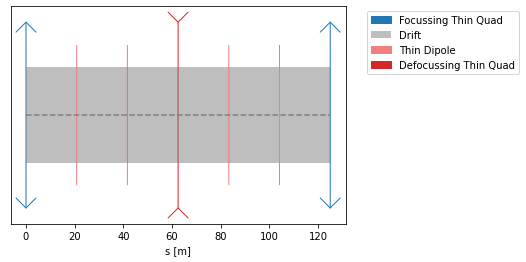

In [8]:
FODO_thin.plot()

In [9]:
FODO_thin.m[np.ix_([0, 1])]

TransferMatrix([[ 9.61410107e-01,  1.42363281e+02,  0.00000000e+00,
                  0.00000000e+00,  0.00000000e+00],
                [-5.31672245e-04,  9.61410107e-01,  0.00000000e+00,
                  0.00000000e+00,  0.00000000e+00]])

In [10]:
FODO_thin.m[0:2, 0:2]

TransferMatrix([[ 9.61410107e-01,  1.42363281e+02],
                [-5.31672245e-04,  9.61410107e-01]])

In [11]:
FODO_thin.solve_twiss()

array([[5.17460257e+02],
       [0.00000000e+00],
       [1.93251556e-03]])

In [12]:
FODO_thin.m.twiss('h') @ FODO_thin.solve_twiss()

array([[5.17460257e+02],
       [1.66533454e-16],
       [1.93251556e-03]])

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:xlabel='s [m]'>)

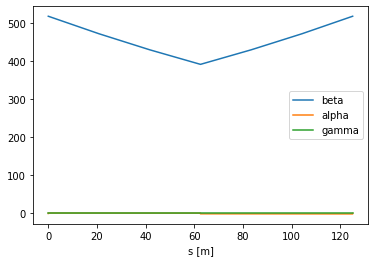

In [13]:
FODO_thin.twiss().plot()

In [14]:
FODO_thin.twiss().beta

array([517.46025711, 517.46025711, 471.48942086, 471.48942086,
       429.41486389, 429.41486389, 391.23658621, 391.23658621,
       429.41486389, 429.41486389, 471.48942086, 471.48942086,
       517.46025711, 517.46025711])

In [15]:
target = TargetTwiss('quad_thin_f', [300, None, None], plane='h')
FODO_thin.constraints.add_target(target)
FODO_thin.constraints.add_free_parameter('quad_thin_f', "f")
FODO_thin.constraints.add_free_parameter('quad_thin_d', "f")

In [16]:
%time matched, opt_res = FODO_thin.constraints.match()

CPU times: user 73.7 ms, sys: 6.2 ms, total: 79.9 ms
Wall time: 79.8 ms


In [17]:
opt_res

 final_simplex: (array([[ 388.7644557 , -255.31945265],
       [ 388.76455112, -255.31954996],
       [ 388.76450068, -255.31949852]]), array([2.67051386e-10, 3.79153465e-10, 5.95559936e-10]))
           fun: 2.6705138606412e-10
       message: 'Optimization terminated successfully.'
          nfev: 126
           nit: 68
        status: 0
       success: True
             x: array([ 388.7644557 , -255.31945265])

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:xlabel='s [m]'>)

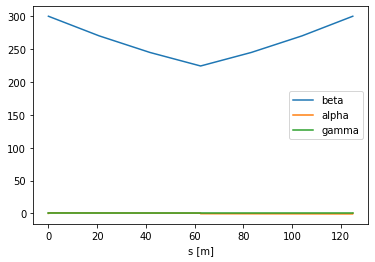

In [18]:
matched.twiss().plot()

In [19]:
matched.solve_twiss('h')

array([[3.00000000e+02],
       [2.37397140e-16],
       [3.33333333e-03]])

# the matching example in the docstring matching the minimum beta

In [20]:
lat = Lattice([QuadrupoleThin(1.6, name='quad_f'),
               Drift(1),
               QuadrupoleThin(-0.8, name='quad_d'),
               Drift(1),
               QuadrupoleThin(1.6, name='quad_f')])
lat.constraints.add_free_parameter("quad_f", "f")
lat.constraints.add_free_parameter("quad_d", "f")
target = TargetTwiss("quad_d", [0.5, None, None], plane='h')
lat.constraints.add_target(target)
%time matched, opt_res = lat.constraints.match()

CPU times: user 27.1 ms, sys: 251 µs, total: 27.3 ms
Wall time: 26.8 ms


In [21]:
opt_res

 final_simplex: (array([[ 1.31905279, -0.91813084],
       [ 1.31905678, -0.91803312],
       [ 1.31905318, -0.91812127]]), array([1.17692656e-09, 1.54066626e-09, 2.41138354e-09]))
           fun: 1.1769265562122655e-09
       message: 'Optimization terminated successfully.'
          nfev: 84
           nit: 46
        status: 0
       success: True
             x: array([ 1.31905279, -0.91813084])

In [22]:
matched

Lattice([QuadrupoleThin(f=1.3190527861614934, name='quad_f'), Drift(l=1, name='drift_1'), QuadrupoleThin(f=-0.9181308379887323, name='quad_d'), Drift(l=1, name='drift_2'), QuadrupoleThin(f=1.3190527861614934, name='quad_f')])

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:xlabel='s [m]'>)

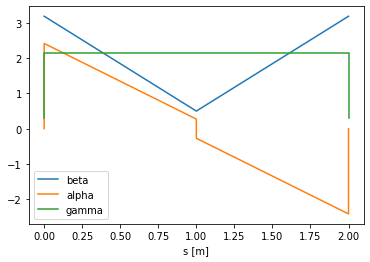

In [23]:
matched.twiss().plot()

# Same thing but now with constraints to set both strengths to be equal

In [24]:
lat = Lattice([QuadrupoleThin(1.6, name='quad_f'),
               Drift(1),
               QuadrupoleThin(-0.8, name='quad_d'),
               Drift(1),
               QuadrupoleThin(1.6, name='quad_f')])
lat.constraints.add_free_parameter("quad_f", "f")
lat.constraints.add_free_parameter("quad_d", "f")
target = TargetTwiss("quad_d", [0.5, None, None], plane='h')
lat.constraints.add_target(target)

In [25]:
# The constraint can be read a quad_f.f + 2*quad_d.f == 0
%time matched, opt_res = lat.constraints.match(constraints=({'type':'eq', 'fun': lambda x: x[0] + 2*x[1]}))

CPU times: user 16.6 ms, sys: 3.22 ms, total: 19.8 ms
Wall time: 17.5 ms


In [26]:
opt_res

     fun: 1.1505543184853195e-09
     jac: array([-1.00876346,  0.03753218])
 message: 'Optimization terminated successfully'
    nfev: 44
     nit: 10
    njev: 10
  status: 0
 success: True
       x: array([ 1.32948354, -0.66474177])

In [27]:
matched

Lattice([QuadrupoleThin(f=1.3294835420782263, name='quad_f'), Drift(l=1, name='drift_3'), QuadrupoleThin(f=-0.6647417710391131, name='quad_d'), Drift(l=1, name='drift_4'), QuadrupoleThin(f=1.3294835420782263, name='quad_f')])

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:xlabel='s [m]'>)

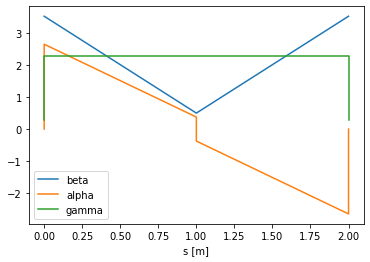

In [28]:
matched.twiss().plot()

# case where there is no twiss solution, failure expected

In [29]:
lat = Lattice([Drift(1)])
target = TargetTwiss("drift", [10, None, None], plane='h')
lat.constraints.add_target(target)
lat.constraints.add_free_parameter('drift', "l")

In [30]:
lat.constraints.match()

/home/lcoyle/.cache/pypoetry/virtualenvs/accelerator-7M8YfYAd-py3.8/lib/python3.8/site-packages/scipy/optimize/optimize.py:700: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):


(Lattice([Drift(l=1.0, name='drift_5')]),
  final_simplex: (array([[1.],
        [1.]]), array([inf, inf]))
            fun: inf
        message: 'Maximum number of function evaluations has been exceeded.'
           nfev: 200
            nit: 67
         status: 1
        success: False
              x: array([1.]))